In [0]:
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from PIL import Image
from sklearn.metrics import r2_score
import sys
from numpy import linalg as LA
from keras.utils import to_categorical
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")


import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)
import random
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [39]:
#Preparing Dataset
def data_create(size):
    # total_samples = 2000
    seq = []
    labels = []
    p = 100
    for j in range(size):
      first_symbol = random.choice([0,1])
      symbol_idxs = random.choices([i for i in range(2,p+1)],k=p)
      symbol_idxs.insert(0,first_symbol)
      sequence = np.empty((p+1,p+1))
      for i in range(len(symbol_idxs)):
          one_hot_vector = np.zeros(p+1)
          one_hot_vector[symbol_idxs[i]] = 1
          sequence[i] = one_hot_vector
      seq.append(sequence)
      label = [0,0]
      label[first_symbol] = 1
      labels.append(label)
    return np.array(seq), np.array(labels)

data,labels = dataset(6000)
print(data.shape)
print(labels.shape)
  

        



(6000, 101, 101)
(6000, 2)


**LSTM**

Epoch 1/2

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

4800/4800 - 232s - loss: 0.6933 - accuracy: 0.4977 - val_loss: 0.6933 - val_accuracy: 0.4975
Epoch 2/2
4800/4800 - 233s - loss: 0.6933 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.4975


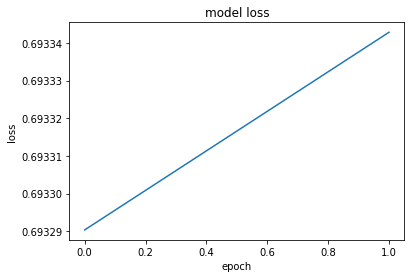


# Evaluate on test data
24/24 [==============================] - 1s 25ms/step - loss: 0.6932 - accuracy: 0.4960
test loss, test acc: [0.6931949853897095, 0.4959999918937683]


In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(2,return_sequences=True),
    tf.keras.layers.LSTM(4,return_sequences=True),
    tf.keras.layers.LSTM(8,return_sequences=False),
    tf.keras.layers.Dense(2, activation='softmax')])
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
              optimizer=tf.keras.optimizers.SGD(0.001),
              metrics=['accuracy'])
history = model.fit(data,labels,
          validation_split=0.2,
          batch_size=1,
          epochs=2,verbose=2)


plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

test_data,test_labels = dataset(3000)
print('\n# Evaluate on test data')
results = model.evaluate(test_data, test_labels, batch_size=128)
print('test loss, test acc:', results)

**RNN**

Epoch 1/2

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

4800/4800 [==============================] - 94s 19ms/step - loss: 0.7076 - accuracy: 0.4971 - val_loss: 0.7034 - val_accuracy: 0.4850
Epoch 2/2
4800/4800 [==============================] - 90s 19ms/step - loss: 0.6980 - accuracy: 0.5121 - val_loss: 0.6992 - val_accuracy: 0.5025


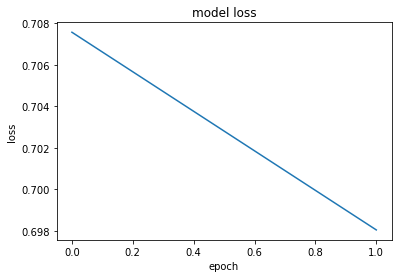


# Evaluate on test data
24/24 [==============================] - 0s 14ms/step - loss: 0.6972 - accuracy: 0.4900
test loss, test acc: [0.697191059589386, 0.49000000953674316]


In [38]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(
    12, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.SimpleRNN(
    10, activation='tanh',return_sequences=False))
model.add(tf.keras.layers.Dense(2,activation='softmax'))


model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
              optimizer=tf.keras.optimizers.SGD(0.001),
              metrics=['accuracy'])


history = model.fit(data,labels,
          validation_split=0.2,
          batch_size=1,
          epochs=2)

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()



test_data,test_labels = dataset(3000)
print('\n# Evaluate on test data')
results = model.evaluate(test_data, test_labels, batch_size=128)
print('test loss, test acc:', results)